<img src="https://upload.wikimedia.org/wikipedia/fr/a/a4/Logo_UT3.jpg" alt="Drawing" style="width: 400px;"/>

# TP n°4 : Manipulation de données

## Objectifs :
* Savoir importer un fichier de donnés (données brutes, images, tableurs) dans un programme  
* Savoir manipuler (tracer, modifier, rechercher...) les données importées dans un programme. 

## Contexte.  
Vous aurez souvent besoin d'importer des données (p.e. issues d'expérimentations) dans votre code afin de les traiter. Ces traitements vont de la simple visualisation à la modification en passant par la recherche de données particulières. Dans ce TP nous allons voir comment importer différents types de données et comment les manipuler en les convertissant en des types (p.e. matrices ou dictionnaires) que nous avons déjà vu. 

## 1. Une première manipulation simple
Sous réserve que vos données soient bien structurées, le module ```numpy``` permet de réaliser des importations simples. Par exemple, si vous avez un fichier texte structuré en colonnes (i.e les reésultats d'une donnée par colonne), vous pouvez l'importer simplement à l'aide de la commande ```loadtxt``` :  
```python
    import numpy as np
    my_data=np.loadtxt("mon_fichier_de_donnees.txt")
``` 
Dans ce cas, `my_data` est une matrice (i.e. numpy.array) contenant, sur chacune de ses colonnes, les colonnes de données contenues dans ``` mon_fichier_de_donnees.txt```. 

Voici un exemple : 

<class 'numpy.ndarray'>


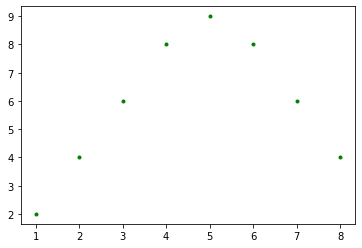

In [3]:
import numpy as np
from matplotlib.pylab import *
data=np.loadtxt("tp6_data1.txt")
print(type(data))
t,z = data[:,0], data[:,1]
plot(t,z,'g.')
show()

A vous de jouer, importez le fichier `tp6_data2.txt` et tracez la troisième colonne en fonction de la première et...soyez la nuit, soyez la vengeance...

## 2. Les images : une deuxième manipulation plus sympathique...

Dans cette section nous allons nous intéresser à la manipulation d'images. C'est, cette fois, la librairie `matplotlib.pyplot` qui va nous permettre d'importer les images sous forme de matrices et la libraire `numpy` qui va nous permettre de les manipuler. 

En particulier `matplotlib.pyplot` contient les deux fonctions que nous utiliserons :
* la fonction `plt.imread` qui prend en argument une chaîne de caractère décrivant le chemin d’accès à un fichier image
au format png et retourne un tableau `numpy`. Ce tableau a même dimension que l’image, et chacune de ses cases
contient un triplet donnant les composantes RGB du pixel correspondant.
* la fonction `plt.imshow` qui prend en argument un tableau `nump` et affiche l’image associée à cette matrice (faire éventuellement suivre cette commande de l’instruction `plt.show()` si le mode interactif n’est pas activé).

Par exemple, la code suivant convertit l’image `father.png` en une matrice numpy nommée `father` et affiche cette matrice-image à l’écran.

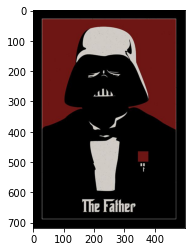

In [13]:
import matplotlib.pyplot as plt
father = plt.imread('father.jpg')
plt.imshow(father)

Chaque case de la matrice-image ```father``` contient un vecteur RGB de taille 3 définissant la couleur du pixel. Par exemple, le case à la position `(34,67)` contient le vecteur RGB `[110  22  20]`

In [14]:
print(father[34,67])

[110  22  20]


### A vous de jouer

Dans la deux question suivante, vous devrez calculer la transformée de cette image par une symétrie. Mais plutôt que de transformer l’image elle-même, vous créerez une nouvelle image contenant l’image transformée (c’est beaucoup plus simple). À partir d’une matrice-image vierge, il faudra recopier chacun des pixels de la matrice-image initiale à son nouvel emplacement dans la matrice-image vierge.

Dans le cas d’une symétrie d’axe vertical, l’image transformée a les mêmes dimensions que l’image initiale. Pour créer la matrice-image vierge, vous utiliserez l’instruction `np.empty_like(img)` qui prend en entrée une matrice `img` et qui renvoie une matrice vierge de mêmes dimensions.

Étant donné un pixel $a$ de coordonnées $a=(x,y)$ dans l’image initiale, ses coordonnées $(x',y')$ dans l’image transformée par une symétrie d’axe vertical passant par le centre de l’image sont données par : 
$$\left\{ \begin{eqnarray} x' & = & x \\ y'  & = & q−1−y \end{eqnarray} \right.$$

<img src="https://i.imgur.com/qaaUVFf.png" alt="Drawing" style="width: 800px;"/>

Ecrivez une fonction `sym(x,y,p,q)` qui prend entrée les coordonnées d'un pixel (`x`,`y`) et la taille d'une image (`p`,`q`) et renvoie les coordonnées du pixel trandsformé par la symétrie verticale décrite plus haut.      



A l'aide de la fonction `sym`, écrivez une fonction `symetrie(img)` qui prend en entrée une matrice-image `img` et qui renvoie une nouvelle matrice-image transformée par la symétrie d’axe vertical. Les dimensions $p\times q$ de l’image initiale peuvent être calculées par les instructions :
* `p = img.shape[0]`
* `q = img.shape[1]`

Vous testerez votre fonction en faisant apparaître à l’écran le résultat de `symetrie(father)`.

## 3. La grande base des Pokemons ou la manipulation de tableur : 

<img src="https://i.imgur.com/TvLFic5.png" alt="Drawing" style="width: 700px;"/>

Le but de cette section est de vous faire importer un tableur (ici fichier csv), de le convertir sous forme de dictionnaire et d'en tirer des informations. 

Le fichier sur lequel nous allons travailler contient les informations sur 721 Pokemons différents (sous leur nom anglais…). Il s'agit du fichier ```Pokemon.csv```. Pour l'importer sous forme de dictionnaire, il faut utiliser la méthode ```DictReader``` du module ```csv```. 

Voici comment procéder :

In [23]:
import csv
fichier = csv.DictReader(open("Pokemon.csv"))

```fichier``` est alors un dictionnaire que vous pouvez manipuler de manière classique : 

In [24]:
print(type(fichier))
liste = list(fichier)
print(liste[0].keys())
print(liste[1])
print(liste[1]["Attack"])
print(liste[1])

<class 'csv.DictReader'>
dict_keys(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])
{'#': '2', 'Name': 'Ivysaur', 'Type 1': 'Grass', 'Type 2': 'Poison', 'Total': '405', 'HP': '60', 'Attack': '62', 'Defense': '63', 'Sp. Atk': '80', 'Sp. Def': '80', 'Speed': '60', 'Generation': '1', 'Legendary': 'False'}
62
{'#': '2', 'Name': 'Ivysaur', 'Type 1': 'Grass', 'Type 2': 'Poison', 'Total': '405', 'HP': '60', 'Attack': '62', 'Defense': '63', 'Sp. Atk': '80', 'Sp. Def': '80', 'Speed': '60', 'Generation': '1', 'Legendary': 'False'}


Répondez mainteanant aux questions que vous vous êtes toujours posées : 

### A) Quel est le Pokemon ayant l'attaque la plus forte ?

![m2](https://i.imgur.com/JTVGtR3.png)
C'est bien beau, mais attaquer sans défendre c'est pas nécessairement une bonne idée.

### B) Quel est le Pokemon qui a la moyenne la plus haute entre attaque et défense ?

![agr](https://i.imgur.com/GuyHPOM.png)
Mon adversaire m'attaque avec un 'Charizard' (on dit Dracofeu en français?), un pokemon de type feu.

Sachant que les pokemon de type "eau" doublent leur attaque et leur défense contre les pokemons de type "feu", quel est le pokemon de type eau qui sera le plus à même d'affronter Charizard ? 
### C) Je cherche donc le pokemon de type eau dont la somme attaque + défense est la plus haute.


![cloy](https://i.imgur.com/2ErgV4J.png)